In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\yaros\AppData\Local\Temp\ipykernel_22796\3381811058.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_fi = pd.read_csv('fields.csv', encoding='1251', sep=';', decimal=',')
#df_fi = pd.read_csv('fields.csv', encoding='1251', sep=',', decimal='.') # у меня с запятой и точкой, тк я пересохранял, в ориг версии ; и ,
df_fi.head()

,field,region,land_type,fertility_score,season,crop,crop_predecessor,crop_yearold,area,hybrid,reproduction,seed_origin,technology,yield_plan,p2o5,k2o,humus,ph
0,22.47.01.001.01,Алтай,пашня,NaN,2023,Оз.пшеница мягкая,Пар; Яр.пшеница мягкая,NaN,306.22,Скипетр,ЭС,Покупные,минимальная,3.8,243.16,226.93,4.46,5.78
1,22.47.01.001.02,Алтай,пашня,NaN,2023,Пар,Пар; Яр.пшеница мягкая,NaN,63.16,NaN,NaN,NaN,минимальная,NaN,243.16,226.93,4.46,5.78
2,22.47.01.002.00,Алтай,пашня,4.0,2023,Пар,Яр.пшеница мягкая,NaN,485.79,NaN,NaN,NaN,NaN,NaN,219.78,204.60,3.85,5.72
3,22.47.01.003.00,Алтай,пашня,4.0,2023,Оз.пшеница мягкая,Пар,NaN,452.25,Скипетр,ЭС,Покупные,минимальная,3.8,205.15,192.28,6.49,5.94
4,22.47.01.004.00,Алтай,пашня,3.0,2023,Оз.пшеница мягкая,Пар,NaN,269.64,Скипетр,ЭС,Покупные,минимальная,3.8,183.26,162.69,6.16,5.94


In [3]:
print(*df_fi['region'].unique(), sep='\n') # посмотреть, какие есть регионы

Алтай
Курск
Калуга
Тюмень
Рязань
СПб
Башкирия
Татарстан
Оренбург
Самара
Новосибирск
Москва
Воронеж


Я добавляю тип основной тип почвы в регионе для категоризации

In [4]:
dict_reg = {
    "Алтай": 'Черноземы', #Черноземы выщелоченные
    "Курск": 'Черноземы', #Черноземы типичные
    "Калуга": 'Дерново-подзолистые',
    "Тюмень": 'Дерново-подзолистые',
    "Рязань": 'Серые лесные',
    "СПб": 'Торфяно- и торфянисто-подзолисто-глеевые',
    "Башкирия": 'Серые лесные',
    "Татарстан": 'Серые лесные',
    "Оренбург": 'Черноземы', #Черноземы южные
    "Самара": 'Черноземы', #Черноземы обыкновенные
    "Новосибирск": 'Черноземы', #Черноземы выщелоченные
    "Москва": 'Дерново-подзолистые',
    "Воронеж": 'Черноземы' #Черноземы выщелоченные/типичные
}

In [ ]:
df_fi['soil'] = df_fi['region'].apply(lambda x: dict_reg[x])
df_fi

,field,region,land_type,fertility_score,season,crop,crop_predecessor,crop_yearold,area,hybrid,reproduction,seed_origin,technology,yield_plan,p2o5,k2o,humus,ph,soil
0,22.47.01.001.01,Алтай,пашня,NaN,2023,Оз.пшеница мягкая,Пар; Яр.пшеница мягкая,NaN,306.22,Скипетр,ЭС,Покупные,минимальная,3.8,243.16,226.93,4.46,5.78,Черноземы
1,22.47.01.001.02,Алтай,пашня,NaN,2023,Пар,Пар; Яр.пшеница мягкая,NaN,63.16,NaN,NaN,NaN,минимальная,NaN,243.16,226.93,4.46,5.78,Черноземы
2,22.47.01.002.00,Алтай,пашня,4.0,2023,Пар,Яр.пшеница мягкая,NaN,485.79,NaN,NaN,NaN,NaN,NaN,219.78,204.60,3.85,5.72,Черноземы
3,22.47.01.003.00,Алтай,пашня,4.0,2023,Оз.пшеница мягкая,Пар,NaN,452.25,Скипетр,ЭС,Покупные,минимальная,3.8,205.15,192.28,6.49,5.94,Черноземы
4,22.47.01.004.00,Алтай,пашня,3.0,2023,Оз.пшеница мягкая,Пар,NaN,269.64,Скипетр,ЭС,Покупные,минимальная,3.8,183.26,162.69,6.16,5.94,Черноземы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16049,36.29.07.042.00,Воронеж,пашня,4.0,2024,Яр.пшеница мягкая,Сах.свекла,NaN,70.48,Ликамеро,РС-2,Покупные,минимальная,5.0,6.05,89.10,77.53,4.95,Черноземы
16050,36.29.07.043.00,Воронеж,пашня,4.0,2024,Соя,Соя,NaN,115.70,Султана,РСт,Покупные,минимальная,2.1,5.94,148.50,127.27,4.18,Черноземы
16051,36.29.07.044.00,Воронеж,пашня,3.0,2024,Соя,Соя,NaN,114.65,Султана,РСт,Покупные,минимальная,2.1,5.94,81.40,126.12,4.84,Черноземы
16052,36.29.07.045.00,Воронеж,пашня,4.0,2024,Кукуруза зерно,Соя,NaN,18.34,Жаклин,F1,Покупные,минимальная,6.5,5.83,130.90,20.17,4.62,Черноземы


In [6]:
print(list(type(elem) for elem in df_fi['p2o5'])[:50])
df_fi['p2o5'].head()

[<class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>]


0    243.16
1    243.16
2    219.78
3    205.15
4    183.26
Name: p2o5, dtype: float64

В p2o5 и k2o найдены стринговые значения, скорее всего, это сдвинулись столбцы (все было исправлено в таблице)

In [7]:
print(set(filter(lambda x: not type(x) == float, df_fi['p2o5'].dropna())), len(list(filter(lambda x: not str(x).isdigit(), df_fi['p2o5'].dropna()))))
print(set(filter(lambda x: not type(x) == float, df_fi['k2o'].dropna())), len(list(filter(lambda x: not str(x).isdigit(), df_fi['k2o'].dropna()))))


set() 16054
set() 16054


Посмотрим количества nan

In [8]:
for col in df_fi.columns:
    if df_fi[col].isna().any(axis=0): # если значение количества NaN'ов больше 0, то выводим эти значения
        print(f'{col}: {df_fi[col].isna().sum()}')

fertility_score: 801
crop_predecessor: 338
crop_yearold: 13369
hybrid: 7376
reproduction: 7861
seed_origin: 7587
technology: 7289
yield_plan: 5358


Средние значения микроэлементов в почве, в них нет нулей, так что на их значения можно полагаться

In [9]:
avg_elems1 = df_fi[['p2o5', 'k2o', 'humus', 'region', 'ph', 'soil']].groupby(['soil', 'region']).agg('mean') # выдавало ошибку (в k2o и p2o5 были стринговые значения)
avg_elems1

p2o5         k2o  \
soil                                     region                                
Дерново-подзолистые                      Калуга        20.377273   35.620407   
                                         Москва        63.563690  111.998790   
                                         Тюмень        44.541835  104.455000   
Серые лесные                             Башкирия       0.000000    0.000000   
                                         Рязань        58.989389  136.709017   
                                         Татарстан     63.989280  136.541876   
Торфяно- и торфянисто-подзолисто-глеевые СПб          102.573960  167.133893   
Черноземы                                Алтай        103.678976  211.289646   
                                         Воронеж       53.288955  107.643896   
                                         Курск         50.353929  103.938865   
                                         Новосибирск   63.828200  115.796536   
                                         Оренбург      15.563531   30.127882   
                                         Самара        68.184979  148.645311   

                                                          humus        ph  
soil                                     region                            
Дерново-подзолистые                      Калуга        9.918786  1.239026  
                                         Москва       47.739127  3.455357  
                                         Тюмень       27.450321  4.915688  
Серые лесные                             Башкирия      0.000000  0.000000  
                                         Рязань       62.762573  4.536460  
                                         Татарстан    35.482497  5.650460  
Торфяно- и торфянисто-подзолисто-глеевые СПб          32.871141  4.355436  
Черноземы                                Алтай        96.652402  4.713543  
                                         Воронеж      42.342930  5.408910  
                                         Курск        65.527013  5.075985  
                                         Новосибирск  83.470424  3.287240  
                                         Оренбург     28.759809  2.703225  
                                         Самара       87.739295  6.250415

В одних и тех же сильно разные данные по городам

In [10]:
df_fi['humus'].describe()

count    16054.000000
mean        39.274405
std         89.421015
min          0.000000
25%          0.000000
50%          5.170000
75%         32.647500
max       1313.870000
Name: humus, dtype: float64

1313% гумуса? Чистим от выбросов

<Axes: ylabel='humus'>

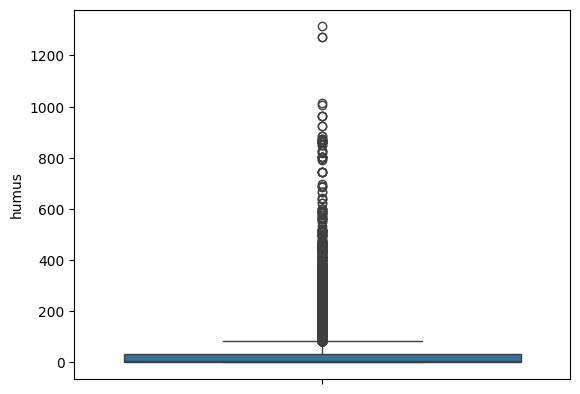

In [11]:
sns.boxplot(df_fi['humus'])

In [12]:
hum_intq = 3 * (df_fi['humus'].quantile(0.75) - df_fi['humus'].quantile(0.25))
hum_mean = df_fi['humus'].mean()
df_fi['humus'] = df_fi.apply(lambda x:x.humus if hum_mean - hum_intq <= x.humus <= hum_mean + hum_intq
                                     else df_fi[(df_fi['region'] == x.region) & (df_fi['soil'] == x.soil) & (df_fi['humus'] < 100)]['humus'].median(),
                                     axis=1)
df_fi['humus'].describe()

count    16054.000000
mean        15.595221
std         29.671448
min          0.000000
25%          0.000000
50%          4.510000
75%          7.700000
max        137.210000
Name: humus, dtype: float64

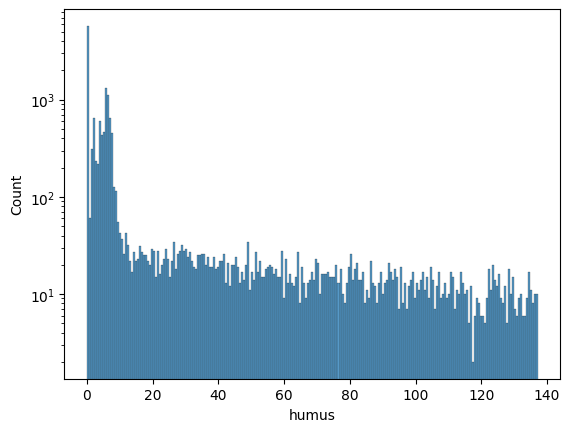

In [13]:
sns.histplot(df_fi['humus'])
plt.yscale('log')

Чисто по полям, для себя

In [14]:
avg_elems2 = df_fi[['p2o5', 'k2o', 'humus', 'ph', 'soil']].groupby(['soil']).agg('mean')
avg_elems2

,p2o5,k2o,humus,ph
soil,,,,
Дерново-подзолистые,25.368748,45.498665,8.564788,1.593263
Серые лесные,51.495088,116.428443,15.719058,4.140871
Торфяно- и торфянисто-подзолисто-глеевые,102.573960,167.133893,20.497315,4.355436
Черноземы,54.263213,107.964238,20.697993,4.807441


По регионам

In [15]:
avg_elems3 = df_fi[['p2o5', 'k2o', 'humus', 'ph', 'region']].groupby(['region']).agg('mean')
avg_elems3

,p2o5,k2o,humus,ph
region,,,,
Алтай,103.678976,211.289646,17.858189,4.713543
Башкирия,0.000000,0.000000,0.000000,0.000000
Воронеж,53.288955,107.643896,25.661610,5.408910
Калуга,20.377273,35.620407,6.984582,1.239026
Курск,50.353929,103.938865,19.309101,5.075985
Москва,63.563690,111.998790,17.892063,3.455357
Новосибирск,63.828200,115.796536,12.592736,3.287240
Оренбург,15.563531,30.127882,9.042385,2.703225
Рязань,58.989389,136.709017,17.779812,4.536460


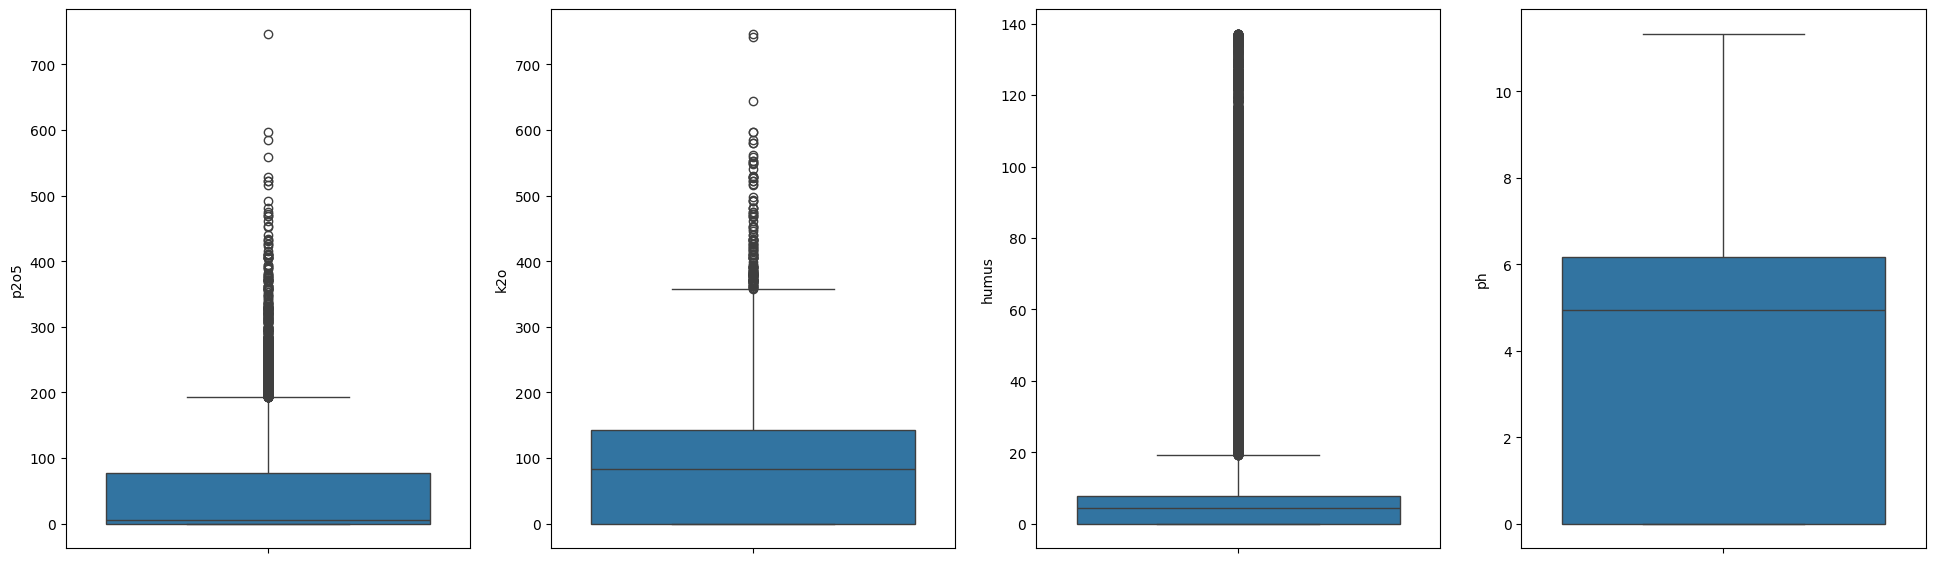

In [16]:
f, ax = plt.subplots(1, 4, figsize=(24, 7))
sns.boxplot(df_fi['p2o5'], ax=ax[0])
sns.boxplot(df_fi['k2o'], ax=ax[1])
sns.boxplot(df_fi['humus'], ax=ax[2])
sns.boxplot(df_fi['ph'], ax=ax[3])
plt.show()

Есть ярко выраженные выбросы везде, кроме ph. Удалим их

In [17]:
std_elems = {}
df_fi2 = {} # создадим словарь средних без учета выбросов
for elem in ['p2o5', 'k2o', 'humus', 'ph']: std_elems[elem] = df_fi[elem].describe()
for elem in ['p2o5', 'k2o', 'humus', 'ph']:
    interq = 3 * (df_fi[elem].quantile(0.75) - df_fi[elem].quantile(0.25))
    df_fi2[elem] = pd.Series(df_fi[elem].apply(lambda x:x if std_elems[elem]['mean'] - interq <= x <= std_elems[elem]['mean'] + interq else np.nan)).mean()
print(pd.Series(df_fi2))

p2o5     40.157902
k2o      88.459004
humus     4.617466
ph        3.584006
dtype: float64


In [18]:
for elem in ['p2o5', 'k2o', 'humus', 'ph']:
    df_fi[f'cat_{elem}'] = df_fi.apply(
        lambda x: -1 if x[elem] < df_fi2[elem] - std_elems[elem]['std'] # категория при низких уровнях
        else 1 if x[elem] > df_fi2[elem] + std_elems[elem]['std'] # категория при высоких уровнях
        else 0, # основная категория (обыватели скучные)
        axis=1)
df_fi.head(2)

,field,region,land_type,fertility_score,season,crop,crop_predecessor,crop_yearold,area,hybrid,...,yield_plan,p2o5,k2o,humus,ph,soil,cat_p2o5,cat_k2o,cat_humus,cat_ph
0,22.47.01.001.01,Алтай,пашня,NaN,2023,Оз.пшеница мягкая,Пар; Яр.пшеница мягкая,NaN,306.22,Скипетр,...,3.8,243.16,226.93,4.46,5.78,Черноземы,1,1,0,0
1,22.47.01.001.02,Алтай,пашня,NaN,2023,Пар,Пар; Яр.пшеница мягкая,NaN,63.16,NaN,...,NaN,243.16,226.93,4.46,5.78,Черноземы,1,1,0,0


Создадим для графиков дф с yield без выбросов

In [19]:
df_fi2 = df_fi.copy()
interq = 3 * (df_fi['yield_plan'].quantile(0.75) - df_fi['yield_plan'].quantile(0.25))
df_fi2['yield_plan'] = pd.Series(df_fi['yield_plan'].apply(lambda x:x if df_fi['yield_plan'].mean() - interq <= x <= df_fi['yield_plan'].mean() + interq else np.nan))
df_fi2 = df_fi2.dropna(subset='yield_plan')

<Axes: xlabel='yield_plan', ylabel='Count'>

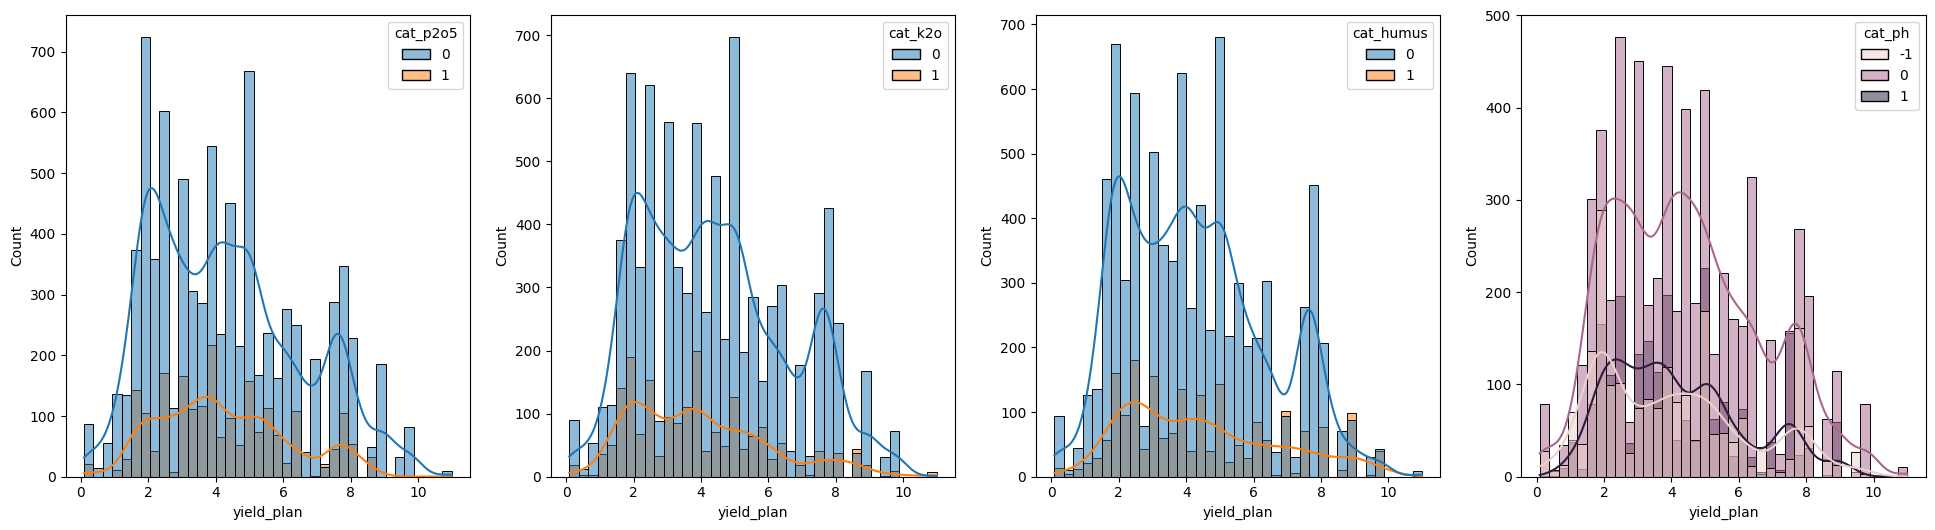

In [20]:
f, ax = plt.subplots(1, 4, figsize=(24, 6))
sns.histplot(data=df_fi2[['yield_plan', "cat_p2o5"]], x='yield_plan', hue="cat_p2o5", ax=ax[0], kde=True)
sns.histplot(data=df_fi2[['yield_plan', "cat_k2o"]], x='yield_plan', hue="cat_k2o", ax=ax[1], kde=True)
sns.histplot(data=df_fi2[['yield_plan', "cat_humus"]], x='yield_plan', hue="cat_humus", ax=ax[2], kde=True)
sns.histplot(data=df_fi2[['yield_plan', "cat_ph"]], x='yield_plan', hue="cat_ph", ax=ax[3], kde=True)

Объединим дфы

In [ ]:
dfv = pd.read_csv('value.csv', sep=';', decimal=',', encoding='1251') # с ним поработаем позже
dfw = pd.read_csv('works.csv', sep=';', encoding='1251')
df_fi['key'] = df_fi.apply(lambda x: (x.season, x.field), axis=1)
dfw['key'] = dfw.apply(lambda x: (x.season, x.field), axis=1)
df_fi.head()

,field,region,land_type,fertility_score,season,crop,crop_predecessor,crop_yearold,area,hybrid,...,p2o5,k2o,humus,ph,soil,cat_p2o5,cat_k2o,cat_humus,cat_ph,key
0,22.47.01.001.01,Алтай,пашня,NaN,2023,Оз.пшеница мягкая,Пар; Яр.пшеница мягкая,NaN,306.22,Скипетр,...,243.16,226.93,4.46,5.78,Черноземы,1,1,0,0,"(2023, 22.47.01.001.01)"
1,22.47.01.001.02,Алтай,пашня,NaN,2023,Пар,Пар; Яр.пшеница мягкая,NaN,63.16,NaN,...,243.16,226.93,4.46,5.78,Черноземы,1,1,0,0,"(2023, 22.47.01.001.02)"
2,22.47.01.002.00,Алтай,пашня,4.0,2023,Пар,Яр.пшеница мягкая,NaN,485.79,NaN,...,219.78,204.60,3.85,5.72,Черноземы,1,1,0,0,"(2023, 22.47.01.002.00)"
3,22.47.01.003.00,Алтай,пашня,4.0,2023,Оз.пшеница мягкая,Пар,NaN,452.25,Скипетр,...,205.15,192.28,6.49,5.94,Черноземы,1,1,0,0,"(2023, 22.47.01.003.00)"
4,22.47.01.004.00,Алтай,пашня,3.0,2023,Оз.пшеница мягкая,Пар,NaN,269.64,Скипетр,...,183.26,162.69,6.16,5.94,Черноземы,1,0,0,0,"(2023, 22.47.01.004.00)"


In [22]:
dfw.head()

,season,field,work_type,work_subtype,start_date,end_date,area,main_tech,add_tech,mech,proc_depth,prod_purpose,prod_weight,prod_dry_perc,prod_humid,prod_impur,yield_fact,work_id,key
0,2023,16.13.12.044.00,Обработка почвы,Боронование,29.04.2022,30.04.2022,"49,78","Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Ахметсафин Айрат Рафикович,"10,00",NaN,"0,00",NaN,NaN,NaN,"0,00",A06AD38A-5448-40EC-B095-4B8918B4AC10,"(2023, 16.13.12.044.00)"
1,2023,16.13.12.017.00,Обработка почвы,Боронование,01.05.2022,02.05.2022,"154,76","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Ямалетдинов Фарид Расыхович,"10,00",NaN,"0,00",NaN,NaN,NaN,"0,00",62B13DCE-FFB5-4E7A-8F1B-88930BD338EF,"(2023, 16.13.12.017.00)"
2,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"40,62","Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Мухаметзянов Ринат Айратович,"10,00",NaN,"0,00",NaN,NaN,NaN,"0,00",D5884A6D-4710-4C0A-8E5A-878291B89846,"(2023, 16.13.12.012.00)"
3,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"86,00","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,"10,00",NaN,"0,00",NaN,NaN,NaN,"0,00",7A504837-1127-4315-ACF1-171AC80111BF,"(2023, 16.13.12.012.00)"
4,2023,16.13.12.017.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"76,00","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,"10,00",NaN,"0,00",NaN,NaN,NaN,"0,00",7FE86DA8-614B-4EBE-85CB-6AF80C08689F,"(2023, 16.13.12.017.00)"


In [23]:
print(len(dfw.key.unique()), len(df_fi.key.unique()))

12327 16054


Разное количество ключей для связки :\ тупо concat не получится использовать

Плюсом сверху идет то, что данных в works в 10 раз больше, чем в fields, объединять ток через словари, groupby и тд, а там полная хуйня получится, с которой работать анрил => забиваю болт на это пока что

Начнем проводить категоризацию микровеществ в полях